# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        city_weather = requests.get(city_url).json()
        # Parse out the max temp, humidity, and cloudiness
        city_name = city_weather['name']
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"] 
              
            
        # Append the City information into city_data list
        city_data.append({"City": city_name, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    
    # If an error is experienced, skip the city
    except:
        print("Data not found in this row. skip the row...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | podosinovets
Processing Record 2 of Set 1 | castro
Processing Record 3 of Set 1 | east london
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | port elizabeth
Processing Record 6 of Set 1 | esperance
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | port macquarie
Processing Record 10 of Set 1 | taolanaro
Data not found in this row. skip the row...
Processing Record 11 of Set 1 | shimoda
Processing Record 12 of Set 1 | chuy
Processing Record 13 of Set 1 | malinovskiy
Processing Record 14 of Set 1 | saint george
Processing Record 15 of Set 1 | carnarvon
Processing Record 16 of Set 1 | quelimane
Processing Record 17 of Set 1 | zaysan
Processing Record 18 of Set 1 | sangar
Processing Record 19 of Set 1 | labuhan
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 

KeyboardInterrupt: 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# Convert array of dictionaries to a pandas DataFrame.
weather_data_df = pd.DataFrame(city_data)
weather_data_df.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Podosinovets,60.2776,47.0659,8.87,94,99,2.98,RU,1670095756
1,Castro,-24.7911,-50.0119,71.94,85,100,1.77,BR,1670095757
2,East London,-33.0153,27.9116,66.34,75,100,5.86,ZA,1670095757
3,Hermanus,-34.4187,19.2345,60.80,63,99,8.55,ZA,1670095757
4,Port Elizabeth,-33.9180,25.5701,65.10,85,20,2.30,ZA,1670095758


In [12]:
weather_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,9.300000e+01
mean,13.010510,14.393603,50.993118,77.838710,70.419355,10.664624,1.670096e+09
std,40.196102,101.085397,29.273075,16.193323,36.302570,7.960593,7.092922e+01
min,-54.800000,-173.300000,-28.190000,24.000000,0.000000,1.010000,1.670095e+09
25%,-24.866700,-70.916700,28.420000,71.000000,37.000000,5.140000,1.670096e+09
50%,9.750000,19.234500,61.250000,82.000000,88.000000,8.010000,1.670096e+09
75%,50.588100,112.205100,74.280000,89.000000,100.000000,14.970000,1.670096e+09
max,77.484000,172.790200,89.220000,100.000000,100.000000,40.290000,1.670096e+09


In [13]:
weather_data_df.count()

City          93
Lat           93
Lng           93
Max Temp      93
Humidity      93
Cloudiness    93
Wind Speed    93
Country       93
Date          93
dtype: int64

In [14]:
#Export the created dataframe to .csv file
weather_data_df.to_csv('../output_data/cities.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
humidity_df = weather_data_df[weather_data_df['Humidity']>100]
humidity_df
# No humity above 100 shown.  Note:  could have done it from above .df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [17]:
#  Get the indices of cities that have humidity over 100%.
humidity_df.index

Int64Index([], dtype='int64')

In [18]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
city_index =weather_data_df[(weather_data_df["Humidity"] >100)].index
weather_data_df.drop(city_index , inplace=True)
weather_data_df.head()
  

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Podosinovets,60.2776,47.0659,8.87,94,99,2.98,RU,1670095756
1,Castro,-24.7911,-50.0119,71.94,85,100,1.77,BR,1670095757
2,East London,-33.0153,27.9116,66.34,75,100,5.86,ZA,1670095757
3,Hermanus,-34.4187,19.2345,60.80,63,99,8.55,ZA,1670095757
4,Port Elizabeth,-33.9180,25.5701,65.10,85,20,2.30,ZA,1670095758


In [19]:
city_data_df.count()

City          93
Lat           93
Lng           93
Max Temp      93
Humidity      93
Cloudiness    93
Wind Speed    93
Country       93
Date          93
dtype: int64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

KeyError: 'Max Temp (F)'

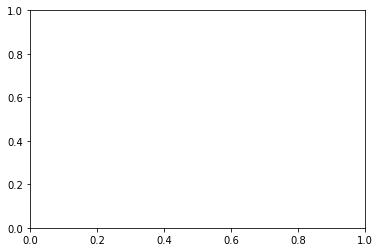

In [21]:
lat_v_temp = weather_data_df.plot(kind="scatter", x="Lat", y="Max Temp (F)",grid=True, figsize=(6,4), c="steelblue", edgecolors = "black", 
                               s=40, alpha=0.8, title="City Latitude vs. Max Temperature")
lat_v_temp.set_xlabel("Latitude")
lat_v_temp.set_ylabel("Max Temperature (F)")
output_file = ("../output_data/latvstemp.png")
plt.savefig(output_file)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/lat_temp.png'

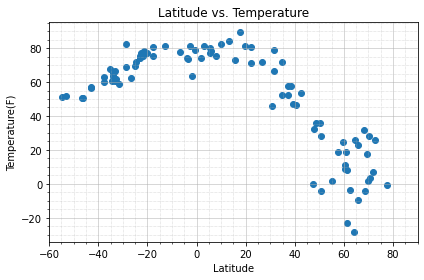

In [20]:
#Havent created the images file and change the command line
x_axis = weather_data_df["Lat"]
y_axis = weather_data_df["Max Temp"]

#Plotting scatter plot for Latitude vs. Temperature Plot
plt.scatter(x_axis_data,y_axis_data)
plt.title('Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature(F)')
plt.minorticks_on()
plt.grid(which = 'major', linestyle = '-', linewidth = 0.5 )
plt.grid(which = 'minor', linestyle = ':', linewidth = 0.5 )
plt.xlim(-60,90)
plt.tight_layout()
#plot and show
plt.savefig("output_data/lat_temp.png")
plt.show()

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression